In [5]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [6]:
complaints = pd.read_csv('../data/service-requests.zip', compression='zip')

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

### What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33526864,06/06/2016 05:01:00 PM,06/08/2016 03:41:00 PM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,GRAND CONCOURSE,206 ST E,INTERSECTION,NaN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,06/08/2016 03:41:00 PM,Unspecified BRONX,BRONX,NaN,NaN,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33527101,06/06/2016 01:18:00 PM,06/07/2016 01:18:00 PM,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10037,1960 PARK AVENUE,PARK AVENUE,HARLEM RIVER DRIVE SB EN PRK,HARLEM RIVER DRIVE EXIT 20,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection inv...,06/07/2016 01:18:00 PM,11 MANHATTAN,MANHATTAN,1002035.0,234251.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.809623,-73.935754,"(40.80962280597619, -73.93575360303117)"
2,33527148,06/07/2016 12:29:18 AM,06/07/2016 01:46:13 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10030,101 WEST 141 STREET,WEST 141 STREET,LENOX AVENUE,7 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/07/2016 08:29:18 AM,The Police Department responded to the complai...,06/07/2016 01:46:13 AM,10 MANHATTAN,MANHATTAN,1001328.0,237302.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817998,-73.938300,"(40.817998342152926, -73.93829980045645)"
3,33527176,06/06/2016 10:12:00 PM,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",NaN,NaN,NaN,NaN,NaN,NaN,26 ST,ROBERT F KENNEDY BRIDGE,INTERSECTION,NaN,NaN,NaN,Open,NaN,NaN,NaN,Unspecified QUEENS,QUEENS,NaN,NaN,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33527223,06/07/2016 12:39:55 AM,06/08/2016 12:45:08 AM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,06/08/2016 12:39:55 AM,The literature will be emailed within 24 hours...,06/07/2016 12:44:24 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [4]:
complaints['Complaint Type']

0                 Street Light Condition
1                                   Lead
2                Noise - Street/Sidewalk
3                            Air Quality
4                 HPD Literature Request
5                       Street Condition
6                                  SCRIE
7                                  SCRIE
8                           Water System
9                Maintenance or Facility
10                DOF Literature Request
11              Benefit Card Replacement
12                                 Noise
13                          Water System
14         General Construction/Plumbing
15         DOF Property - Update Account
16                                 SCRIE
17                DOF Literature Request
18                DOF Literature Request
19                       Illegal Parking
20               Maintenance or Facility
21                                 Sewer
22                                 Sewer
23                  UNSANITARY CONDITION
24              

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [7]:
complaints[:5]
complaints.ix[:5]
complaints.iloc[:5]
complaints.loc[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33526864,06/06/2016 05:01:00 PM,06/08/2016 03:41:00 PM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,GRAND CONCOURSE,206 ST E,INTERSECTION,NaN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,06/08/2016 03:41:00 PM,Unspecified BRONX,BRONX,NaN,NaN,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33527101,06/06/2016 01:18:00 PM,06/07/2016 01:18:00 PM,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10037,1960 PARK AVENUE,PARK AVENUE,HARLEM RIVER DRIVE SB EN PRK,HARLEM RIVER DRIVE EXIT 20,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection inv...,06/07/2016 01:18:00 PM,11 MANHATTAN,MANHATTAN,1002035.0,234251.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8096,-73.9358,"(40.80962280597619, -73.93575360303117)"
2,33527148,06/07/2016 12:29:18 AM,06/07/2016 01:46:13 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10030,101 WEST 141 STREET,WEST 141 STREET,LENOX AVENUE,7 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/07/2016 08:29:18 AM,The Police Department responded to the complai...,06/07/2016 01:46:13 AM,10 MANHATTAN,MANHATTAN,1001328.0,237302.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8180,-73.9383,"(40.817998342152926, -73.93829980045645)"
3,33527176,06/06/2016 10:12:00 PM,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",NaN,NaN,NaN,NaN,NaN,NaN,26 ST,ROBERT F KENNEDY BRIDGE,INTERSECTION,NaN,NaN,NaN,Open,NaN,NaN,NaN,Unspecified QUEENS,QUEENS,NaN,NaN,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33527223,06/07/2016 12:39:55 AM,06/08/2016 12:45:08 AM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,06/08/2016 12:39:55 AM,The literature will be emailed within 24 hours...,06/07/2016 12:44:24 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,33527355,06/06/2016 03:41:18 PM,06/13/2016 09:36:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11377,NaN,NaN,NaN,NaN,51 AVENUE,70 STREET,INTERSECTION,Woodside,NaN,NaN,Closed,NaN,The Department of Transportation inspected thi...,06/13/2016 09:36:00 AM,02 QUEENS,QUEENS,1013566.0,207275.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Uns

We can combine these to get the first 5 rows of a column:

In [6]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [8]:
complaints[:5]['Complaint Type']

0     Street Light Condition
1                       Lead
2    Noise - Street/Sidewalk
3                Air Quality
4     HPD Literature Request
Name: Complaint Type, dtype: object

# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [8]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [9]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [7]:
complaints['Complaint Type'].value_counts()

Noise - Residential                  20948
Illegal Parking                      11802
Blocked Driveway                     10407
Noise - Street/Sidewalk               9025
Street Condition                      9009
Street Light Condition                7605
UNSANITARY CONDITION                  6814
Water System                          5574
Homeless Person Assistance            5488
Noise                                 5151
PAINT/PLASTER                         5035
Noise - Commercial                    4983
Sanitation Condition                  3958
PLUMBING                              3786
Dirty Conditions                      3575
Rodent                                3183
Noise - Vehicle                       3048
Damaged Tree                          3018
General Construction/Plumbing         2909
Missed Collection (All Materials)     2903
DOOR/WINDOW                           2813
Traffic Signal Condition              2811
Derelict Vehicle                      2810
Sewer      

If we just wanted the top 10 most common complaints, we can do this:

In [10]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Noise - Residential           20948
Illegal Parking               11802
Blocked Driveway              10407
Noise - Street/Sidewalk        9025
Street Condition               9009
Street Light Condition         7605
UNSANITARY CONDITION           6814
Water System                   5574
Homeless Person Assistance     5488
Noise                          5151
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

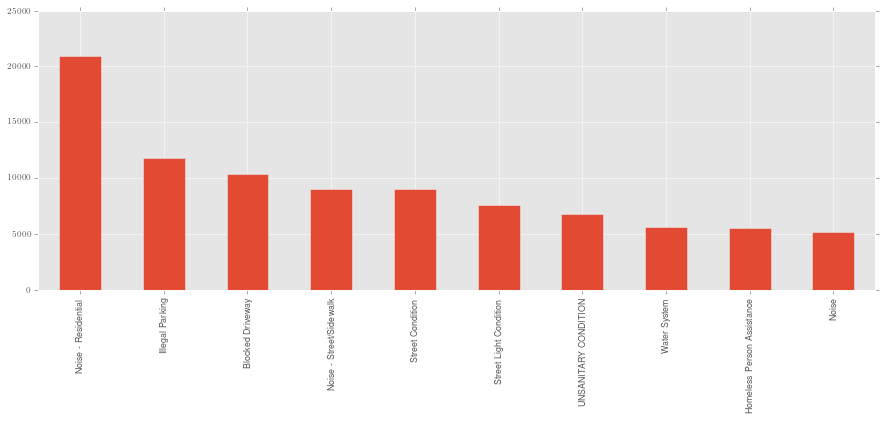

In [11]:
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  